# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [20]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jrandolph37/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [22]:
# Create a newsapi client
newsapi= NewsApiClient(api_key=api_key)

In [23]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",)

#Total number of articles 
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

#sample
Bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 6626


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'AMC theaters will accept cryptocurrencies beyond Bitcoin',
 'description': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bitcoin Cash when crypto payments are available. He didn't hav…",
 'url': 'https://www.engadget.com/amc-theaters-accept-ethereum-litecoin-bitcoin-cash-132642183.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/4a01cb80-16eb-11ec-abfe-c7b840dd48ca',
 'publishedAt': '2021-09-16T13:26:42Z',
 'content': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"}

In [24]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",)

#total number of articles 
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

#sample
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 2669


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Kim Lyons',
 'title': 'China’s central bank bans cryptocurrency transactions to avoid ‘risks’',
 'description': 'China’s central bank on Friday said cryptocurrency transactions in the country are illegal, banning all transactions. It said cryptocurrencies like bitcoin and Ethereum are not legal tender and can’t be circulated.',
 'url': 'https://www.theverge.com/2021/9/24/22691472/china-central-bank-cryptocurrency-illegal-bitcoin',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2021-09-24T16:22:55Z',
 'content': 'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]'}

In [25]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            })
        
    except AttributeError:
        pass
    
#DataFrame creation 
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

#DataFrame Column Cleanup
columns = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[columns]

Bitcoin_df.head()
    

,Compound,Positive,Negative,Neutral,Text
0,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...
1,0.0000,0.000,0.000,1.000,Four months after Twitter first introduced in-...
2,0.3400,0.076,0.000,0.924,"<ul><li>Bitcoin, in terms of market value, ros..."
3,0.0000,0.000,0.000,1.000,Bitcoin and similar blockchain-based cryptos e...
4,-0.2411,0.000,0.116,0.884,JPMorgan CEO Jamie Dimon is still not a Bitcoi...


In [26]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
             })
        
    except AttributeError:
        pass
    
# DataFrame Creation
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

#DataFrame columns
columns = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[columns]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,Its the countrys latest crackdown on digital c...
1,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...
2,0.2865,0.180,0.126,0.694,OpenSea isn't wasting much time after its head...
3,0.4588,0.108,0.000,0.892,Robinhood plans to start a cryptocurrency wall...
4,0.4215,0.101,0.000,0.899,"image source, foundation.app/@SideEyeingChloe\..."


In [27]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.166905,0.072000,0.028800,0.899300
std,0.369356,0.067508,0.051908,0.073032
min,-0.709600,0.000000,0.000000,0.765000
25%,0.000000,0.000000,0.000000,0.856750
50%,0.208200,0.062000,0.000000,0.896000
75%,0.502100,0.119500,0.037750,0.955000
max,0.726900,0.219000,0.195000,1.000000


In [28]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.00000,20.000000,20.000000,20.000000
mean,0.20408,0.073000,0.023850,0.903250
std,0.37273,0.075682,0.049345,0.093105
min,-0.67050,0.000000,0.000000,0.694000
25%,0.00000,0.000000,0.000000,0.836250
50%,0.16515,0.067000,0.000000,0.908500
75%,0.44500,0.112750,0.009000,1.000000
max,0.87650,0.245000,0.169000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive of 0.072

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score with a max of 87%

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score at .25

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jrandolph37/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jrandolph37/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jrandolph37/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [47]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw= set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# not needed

In [40]:
# Complete the tokenizer function
def tokenizer(text):
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [45]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...,"[wont, stick, bitcoin, youre, determined, pay,..."
1,0.0000,0.000,0.000,1.000,Four months after Twitter first introduced in-...,"[four, month, twitter, first, introduced, inap..."
2,0.3400,0.076,0.000,0.924,"<ul><li>Bitcoin, in terms of market value, ros...","[ullibitcoin, term, market, value, rose, lilii..."
3,0.0000,0.000,0.000,1.000,Bitcoin and similar blockchain-based cryptos e...,"[bitcoin, similar, blockchainbased, cryptos, e..."
4,-0.2411,0.000,0.116,0.884,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."


In [46]:
# Create a new tokens column for Ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head() 

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,Its the countrys latest crackdown on digital c...,"[country, latest, crackdown, digital, currenci..."
1,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...,"[wont, stick, bitcoin, youre, determined, pay,..."
2,0.2865,0.180,0.126,0.694,OpenSea isn't wasting much time after its head...,"[opensea, isnt, wasting, much, time, head, pro..."
3,0.4588,0.108,0.000,0.892,Robinhood plans to start a cryptocurrency wall...,"[robinhood, plan, start, cryptocurrency, walle..."
4,0.4215,0.101,0.000,0.899,"image source, foundation.app/@SideEyeingChloe\...","[image, source, foundationappsideeyeingchloeim..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [48]:
from collections import Counter
from nltk import ngrams

In [56]:
#Token crypto Articles 
bitcoin_p = tokenizer(Bitcoin_df.Text.str.cat())
ethereum_p= tokenizer(Ethereum_df.Text.str.cat())

In [57]:
# Generate the Bitcoin N-grams where N=2
n=2
bigram_counts_B = Counter(ngrams(bitcoin_p, n))
print(dict(bigram_counts_B))

{('wont', 'stick'): 1, ('stick', 'bitcoin'): 1, ('bitcoin', 'youre'): 1, ('youre', 'determined'): 1, ('determined', 'pay'): 1, ('pay', 'movie'): 1, ('movie', 'ticket'): 1, ('ticket', 'cryptocurrency'): 1, ('cryptocurrency', 'amc'): 1, ('amc', 'chief'): 1, ('chief', 'adam'): 1, ('adam', 'aron'): 1, ('aron', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'theater'): 1, ('theater', 'chain'): 1, ('chain', 'also'): 1, ('also', 'accept'): 1, ('accept', 'ethereum'): 1, ('ethereum', 'litecoin'): 1, ('litecoin', 'bi'): 1, ('bi', 'charsfour'): 1, ('charsfour', 'month'): 1, ('month', 'twitter'): 1, ('twitter', 'first'): 1, ('first', 'introduced'): 1, ('introduced', 'inapp'): 1, ('inapp', 'tipping'): 1, ('tipping', 'company'): 1, ('company', 'expanding'): 1, ('expanding', 'tip'): 1, ('tip', 'jar'): 1, ('jar', 'feature'): 1, ('feature', 'major'): 1, ('major', 'way'): 1, ('way', 'company'): 1, ('company', 'opening'): 1, ('opening', 'tipping'): 1, ('tipping', 'user'): 1, ('user', 'globally'): 1, ('glo

In [58]:
# Generate the Ethereum N-grams where N=2
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

{('country', 'latest'): 1, ('latest', 'crackdown'): 1, ('crackdown', 'digital'): 1, ('digital', 'currenciesillustration'): 1, ('currenciesillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethe'): 1, ('vergethe', 'peoples'): 1, ('peoples', 'bank'): 1, ('bank', 'china'): 1, ('china', 'country'): 1, ('country', 'central'): 1, ('central', 'bank'): 1, ('bank', 'said'): 1, ('said', 'friday'): 1, ('friday', 'cryptocurrency'): 1, ('cryptocurrency', 'transaction'): 1, ('transaction', 'ar'): 1, ('ar', 'charsyou'): 1, ('charsyou', 'wont'): 1, ('wont', 'stick'): 1, ('stick', 'bitcoin'): 1, ('bitcoin', 'youre'): 1, ('youre', 'determined'): 1, ('determined', 'pay'): 1, ('pay', 'movie'): 1, ('movie', 'ticket'): 1, ('ticket', 'cryptocurrency'): 1, ('cryptocurrency', 'amc'): 1, ('amc', 'chief'): 1, ('chief', 'adam'): 1, ('adam', 'aron'): 2, ('aron', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'theater'): 1, ('theater', 'chain'): 1, ('chain', 'also'): 1, ('also', 'accept'): 1, ('accept

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_common= token_count(bitcoin_p, 10)
bitcoin_common

[('bitcoin', 10),
 ('first', 4),
 ('company', 4),
 ('cryptocurrency', 3),
 ('ha', 3),
 ('user', 3),
 ('four', 3),
 ('utoday', 3),
 ('country', 3),
 ('bank', 3)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
ethereum_common= token_count(ethereum_p,10)
ethereum_common

[('ha', 14),
 ('cryptocurrency', 8),
 ('bitcoin', 7),
 ('ethereum', 6),
 ('internet', 4),
 ('buterin', 4),
 ('time', 3),
 ('company', 3),
 ('startup', 3),
 ('network', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

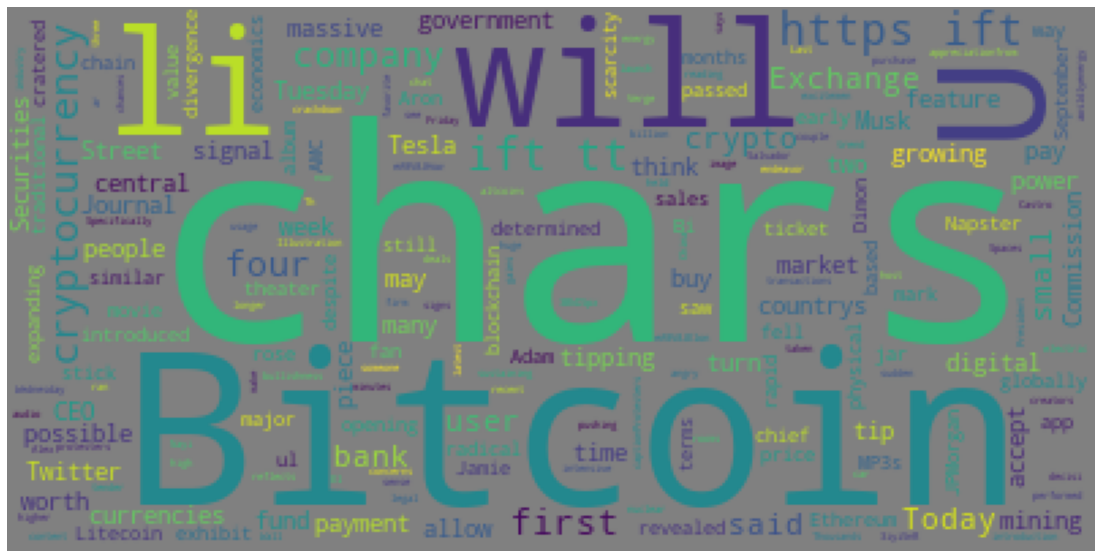

In [63]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='grey').generate(Bitcoin_df.Text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

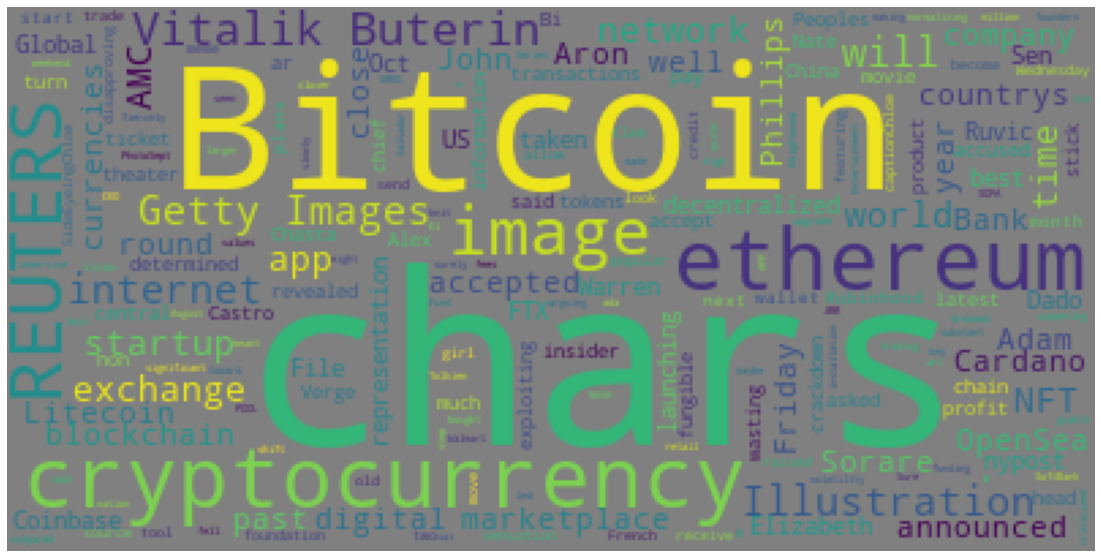

In [64]:
# Generate the Ethereum word cloud
cloud2 = WordCloud(background_color='grey').generate(Ethereum_df.Text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [65]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [66]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [67]:
# Concatenate all of the Bitcoin text together
all_concat_bitcoin = Bitcoin_df.Text.str.cat()
all_concat_bitcoin

'You won\'t have to stick to Bitcoin if you\'re determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]Four months after Twitter first introduced in-app tipping, the company is expanding its tip jar feature in a major way. The company is opening up tipping to all its users globally, and for the first … [+2390 chars]<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars]Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn … [+8436 chars]JPMorgan CEO Jamie Dimon is still not a Bitcoin fan despite rapid price appreciationfrom U.Today https://ift.tt/3iyi5nR https://ift.tt/eA8V

In [68]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc

# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [69]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [70]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

AMC ORG
Adam Aron PERSON
Ethereum PERSON
months DATE
4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
chars]JPMorgan ORG
Jamie Dimon PERSON
Musk PERSON
Tesla PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
Alex Castro PERSON
The Verge
 WORK_OF_ART
The Peoples Bank of China ORG
Friday DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Th ORG
Thousands CARDINAL
El Salvador GPE
Nayi PERSON
electro GPE
two decades DATE
403 million CARDINAL
23 August DATE
UK GPE
four CARDINAL
SEC ORG
two CARDINAL
IMF ORG
Kristalina Georgieva PERSON
Elon Musk PERSON
Tuesday DATE
U.S. GPE
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
16 CARDINAL
Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE


---

### Ethereum NER

In [71]:
# Concatenate all of the Ethereum text together
all_concat_ethereum = Ethereum_df.Text.str.cat()
all_concat_ethereum

'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]You won\'t have to stick to Bitcoin if you\'re determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]OpenSea isn\'t wasting much time after its head of product was accused of exploiting insider information to turn a profit on non-fungible tokens. The marketplace has asked for and accepted Nate Chasta… [+924 chars]Robinhood plans to start a cryptocurrency wallet next month, the company announced on Wednesday. The tool will allow you to send and receive digital currencies, as well as trade them and move them of… [+1090 chars]image source, foundation.app/@SideEyeingChloe\r\nimage captionChloe Clem\'s disapproving look has become an internet sensation\r\nAn imag

In [72]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_concat_ethereum)
ethereum_doc

# Add a title to the document
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [73]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [74]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

Alex Castro PERSON
The Verge
 WORK_OF_ART
The Peoples Bank of China ORG
Friday DATE
AMC ORG
Adam Aron PERSON
Ethereum PERSON
Nate Chasta PERSON
+924 ORG
next month DATE
Wednesday DATE
captionChloe Clem's PERSON
two-year-old DATE
French NORP
Sorare ORG
SoftBank ORG
Vision Fund 2 ORG
$680 million MONEY
4 MONEY
Vitalik Buterin PERSON
2013 DATE
Getty Images PERSON
John Phillips PERSON
Vitalik Buterin PERSON
eight CARDINAL
this past weekend DATE
El Salvador GPE
Elizabeth Warren PERSON
AFP ORG
Getty Images ORG
Elizabeth Warren PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File ORG
15 CARDINAL
Reuters ORG
Adam Aron PERSON
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
Buterin PERSON
2015 DATE
John Phillips PERSON
Vitalik Buterin PERSON
Time ORG
100 CARDINAL
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
the past decade DATE
10,000 CARDINAL
10,000 CARDINAL
41 MONEY
Amazon ORG
OpenSea ORG
iOS GPE
Android GPE
1.5 

---